# Image denoising with autoencoder

In [1]:
import sys

sys.path.append("../")

import keras

import matplotlib.pyplot as plt
import numpy as np

from autoencoder import Autoencoder

2025-01-11 01:55:51.525862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736571351.537909   23421 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736571351.541553   23421 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-11 01:55:51.554852: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.astype(float) / 255.0
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))

x_test = x_test.astype(float) / 255.0
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [4]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)

x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

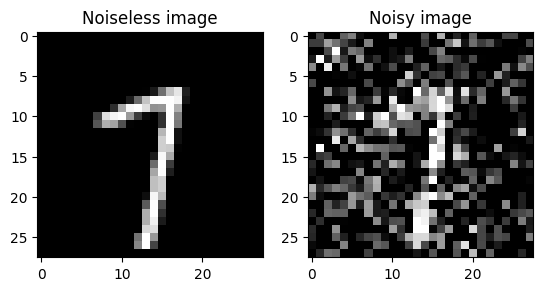

In [5]:
fig, ax = plt.subplots(ncols=2)

i = 42
ax[0].imshow(x_train[i], cmap="gray")
ax[1].imshow(x_train_noisy[i], cmap="gray")
ax[0].set_title("Noiseless image")
ax[1].set_title("Noisy image")
plt.show()

In [6]:
ae_nn = Autoencoder(input_shape=x_train.shape[1:],
                    filters=[28,14],
                    kernel_size=3,
                    strides=(2,2), 
                    padding="same",
                    activation="relu",
                    use_bias=True)

I0000 00:00:1736571356.306772   23421 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1247 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:09:00.0, compute capability: 8.9


In [7]:
ae_nn.encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 14)       │         3,542 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 1)        │           127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,949 (15.43 KB)

 Trainable params: 3,949 (15.43 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
ae_nn.decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7, 7, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 14)     │           140 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 28)     │         3,556 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 1)      │           253 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,949 (15.43 KB)

 Trainable params: 3,949 (15.43 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
ae_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))

In [10]:
callback_history = ae_nn.fit(x=x_train_noisy, y=x_train, epochs=10, validation_data=(x_test_noisy, x_test))

Epoch 1/10


I0000 00:00:1736571359.901664   23511 service.cc:148] XLA service 0x7924d000c100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736571359.901689   23511 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-01-11 01:55:59.924196: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736571360.038994   23511 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-11 01:56:00.656619: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 131/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0790

I0000 00:00:1736571361.037898   23511 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0346 - val_loss: 0.0202
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0201 - val_loss: 0.0189
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0191 - val_loss: 0.0184
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0187 - val_loss: 0.0180
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0184 - val_loss: 0.0178
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0181 - val_loss: 0.0182
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0180 - val_loss: 0.0174
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0177 - val_loss: 0.0173
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0175 - val_loss: 0.0170
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0174 - val_loss: 0.0169


In [11]:
latent_space = ae_nn.encoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step


In [12]:
decoded = ae_nn.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


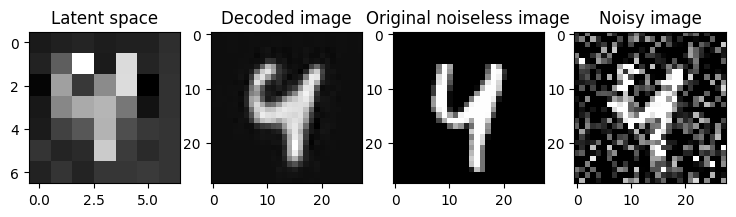

In [13]:
fig, ax = plt.subplots(ncols=4)

fig.set_size_inches((9,9))

i = 42
ax[0].imshow(latent_space[i], cmap="gray")
ax[1].imshow(decoded[i], cmap="gray")
ax[2].imshow(x_test[i], cmap="gray")
ax[3].imshow(x_test_noisy[i], cmap="gray")
ax[0].set_title("Latent space")
ax[1].set_title("Decoded image")
ax[2].set_title("Original noiseless image")
ax[3].set_title("Noisy image")
plt.show()